In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# focus

In [2]:
datadir = "../data/autofocus"

In [3]:
prefix = "Si700-1W-exp3-full-diff"

In [4]:
filenamelist=[ prefix + "-%du.txt" % i for i in range(50, 0, -10) ]
filenamelist.append(prefix + "0.txt")
filenamelist.extend([ prefix + "+%du.txt" % i for i in range(10, 50+10, 10) ])

In [5]:
heightlist = list(range(-50, 50+10, 10))

In [6]:
datalist = []
for filename in filenamelist:
    df = pd.read_csv(os.path.join(datadir, filename), sep="\t", header=None)
    datalist.append(df[1].max())

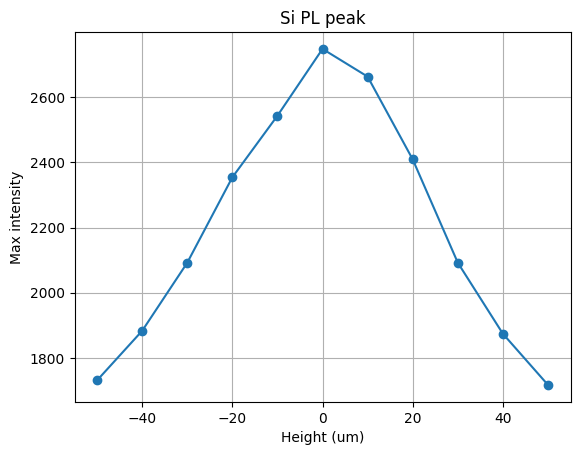

In [7]:
plt.plot(heightlist, datalist, 'o-')
plt.xlabel("Height (um)")
plt.ylabel("Max intensity")
plt.title("Si PL peak")
plt.grid()
plt.show()

# excite polarization

In [8]:
datadir = "../data/excitepolar"

In [9]:
filename = "polarmemo.txt"

In [10]:
with open(os.path.join(datadir, filename)) as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
print(lines)

['785', 'nd0pos', '', '1.26mW(no polar)', '', 'polarization on thorlab GTH10M', '', '0deg, 1.12mW', '22.5deg, 0.92mW', '45deg, 0.65mW', '67.5deg, 0.24mW', '90deg, 0.01mW']


In [11]:
datadeg = [0, 22.5, 45, 67.5, 90]
datapow = [1.12, 0.92, 0.65, 0.24, 0.01]

In [12]:
thetalist = range(0, 360, 1)

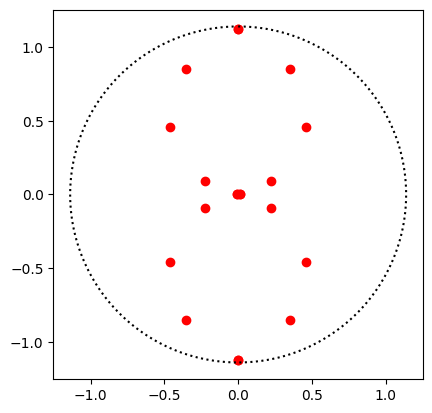

In [13]:
plt.figure()
fig = plt.subplot()
fig.plot(1.26 * 0.90423 * np.sin(np.deg2rad(thetalist)), 1.26 * 0.90423 * np.cos(np.deg2rad(thetalist)), ':', color='black')

for deg, pow in zip(datadeg, datapow):
    fig.scatter(pow * np.sin(np.deg2rad(deg)), pow * np.cos(np.deg2rad(deg)), color='red')
    fig.scatter(-1 * pow * np.sin(np.deg2rad(deg)), pow * np.cos(np.deg2rad(deg)), color='red')
    fig.scatter(pow * np.sin(np.deg2rad(deg)), -1 * pow * np.cos(np.deg2rad(deg)), color='red')
    fig.scatter(-1 * pow * np.sin(np.deg2rad(deg)), -1 * pow * np.cos(np.deg2rad(deg)), color='red')


fig.set_aspect('equal')
plt.show()